In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys
import os.path
sys.path.append(os.path.abspath('../../..'))

from npmf.models import sgd_bias, anls, bmf, pmf
from npmf.unit_models import lmf, emf, smf
from utils.eval import test

import pandas as pd
print('Pandas version:', pd.__version__)
import numpy as np
print('NumPy version:', np.__version__)

import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib version:', mpl.__version__)
%matplotlib inline

%load_ext autoreload
%autoreload 2

Pandas version: 0.23.0
NumPy version: 1.14.3
Matplotlib version: 2.2.2


In [2]:
n_folds = 3
data_dir = '../data'
train_prefix = 'train_eff_%d.gz'
valid_prefix = 'valid_eff_%d.gz'
test_prefix = 'test_eff.gz'

# Load matrices
trains_matrices = [pd.read_csv(os.path.join(data_dir, train_prefix % it), header=None, compression='gzip').values for it in range(n_folds)]
valids_matrices = [pd.read_csv(os.path.join(data_dir, valid_prefix % it), header=None, compression='gzip').values for it in range(n_folds)]
tests_matrices = [pd.read_csv(os.path.join(data_dir, test_prefix), header=None, compression='gzip').values for _ in range(n_folds)]

# Evaluate algorithms

In [3]:
name2ix = {'MF': 0, 'NMF': 1, 'BMF': 2, 'PMF': 3, 'LMF': 4, 'EMF': 5, 'SMF': 6}
ix2name = {v: k for k, v in name2ix.items()}
metric2ix = {'RMSE': 0, 'MAE': 4, 'Precision': 8, 'Recall': 10}
name2alg = {'MF': sgd_bias, 'NMF': anls, 'BMF': bmf, 'PMF': pmf, 'LMF': lmf, 'EMF': emf, 'SMF': smf}

In [4]:
%%capture
k = 10
name2metrics10 = {n: test(name2alg[n], k, trains_matrices, tests_matrices, checkpoints_dir='../checkpoints') for n in name2alg.keys()}
k = 15
name2metrics15 = {n: test(name2alg[n], k, trains_matrices, tests_matrices, checkpoints_dir='../checkpoints') for n in name2alg.keys()}
k = 20
name2metrics20 = {n: test(name2alg[n], k, trains_matrices, tests_matrices, checkpoints_dir='../checkpoints') for n in name2alg.keys()}

# Precision & Recall Plots

In [5]:
def plot_metric(metric, name2metrics, ns):
    width = 0.35  # the width of the bars
    colors = [(119/255,170/255,221/255), 
              (153/255,221/255,255/255), 
              (68/255,187/255,153/255), 
              (187/255,204/255,51/255), 
              (170/255,170/255,0/255), 
              (238/255,221/255,136/255), 
              (238/255,136/255,102/255), 
              (255/255,170/255,197/255),
              (221/255, 221/255, 221/255)]
    markers = ['.', 'o', 's', 'p', '*', 'h', 'x', 'D']
    
    p_means, p_ses = np.zeros((len(name2ix), len(ns))), np.zeros((len(name2ix), len(ns)))
    xlabels = []
    for n, i in name2ix.items():
        p_means[i] = name2metrics[n][metric2ix[metric]][1:]
        p_ses[i] = name2metrics[n][metric2ix[metric]+1][1:]
        xlabels.append(n)

    f, axs = plt.subplots(2, 2, figsize=(24,16))
    for i, n in enumerate(ns):
        rix, cix = i // 2, i % 2

        rects = []
        for j in range(len(p_means)):
            rects.append(axs[rix, cix].bar(j*width, p_means[j, i], width, color=colors[j], yerr=p_ses[j, i], alpha=1))

        axs[rix, cix].set_ylabel(metric + '@' + str(n), fontsize='28')
        axs[rix, cix].set_xticks([j*width for j in range(len(p_means))])
        axs[rix, cix].set_xticklabels(xlabels, fontsize='24')
        axs[rix, cix].tick_params(axis='both', which='major', labelsize=18)
        axs[rix, cix].ticklabel_format(axis='y', style='sci')
        axs[rix, cix].grid()

## K = 10

In [6]:
name2metrics = name2metrics10
ns = [2,3,5,10]

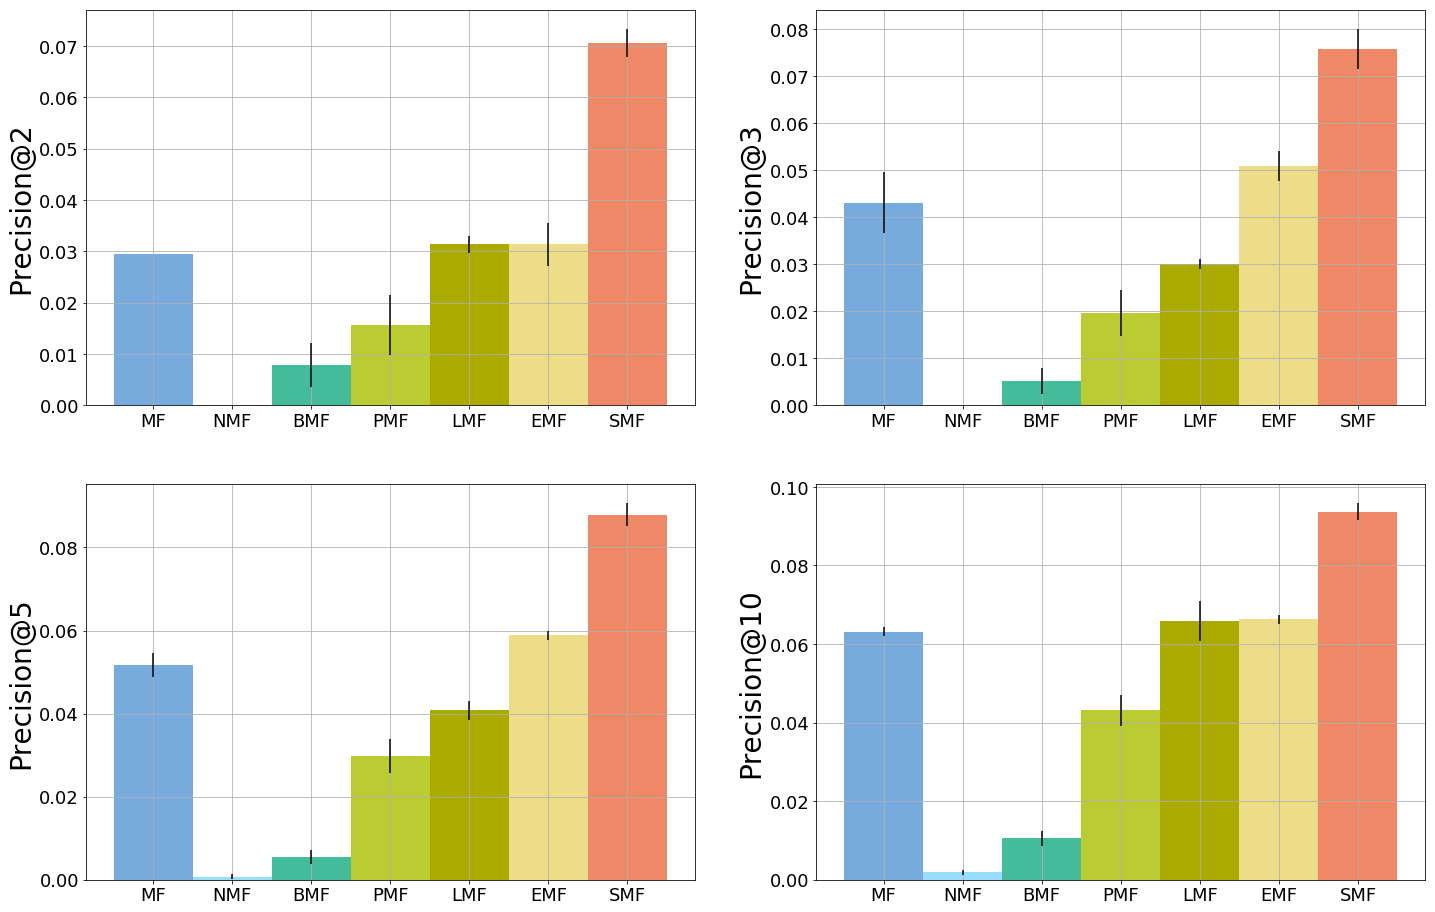

In [7]:
plot_metric('Precision', name2metrics, ns)

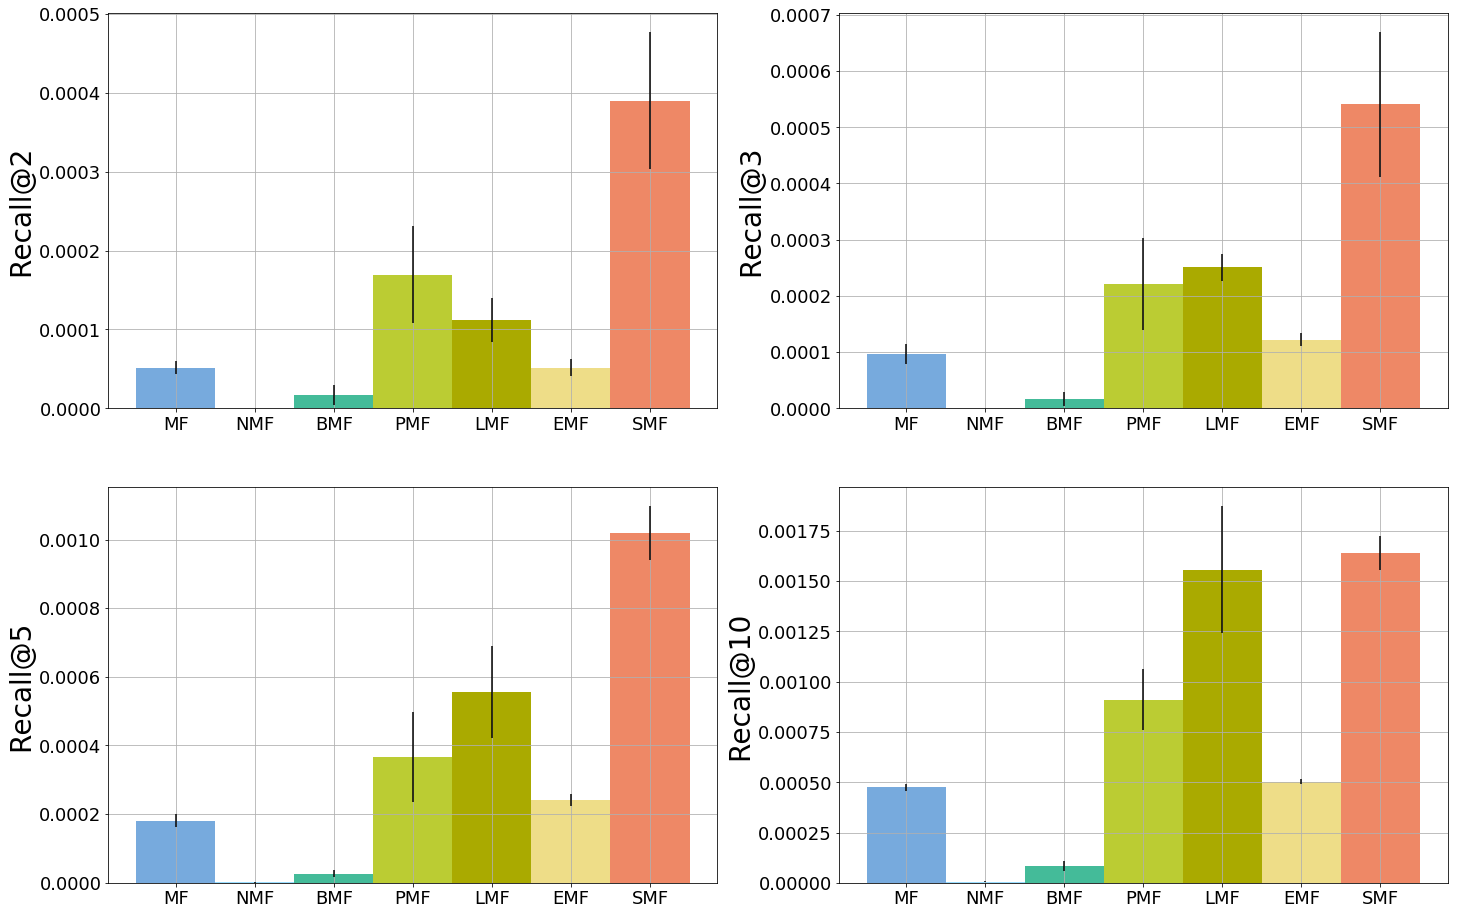

In [8]:
plot_metric('Recall', name2metrics, ns)

## K = 15

In [9]:
name2metrics = name2metrics15
ns = [2,3,5,10]

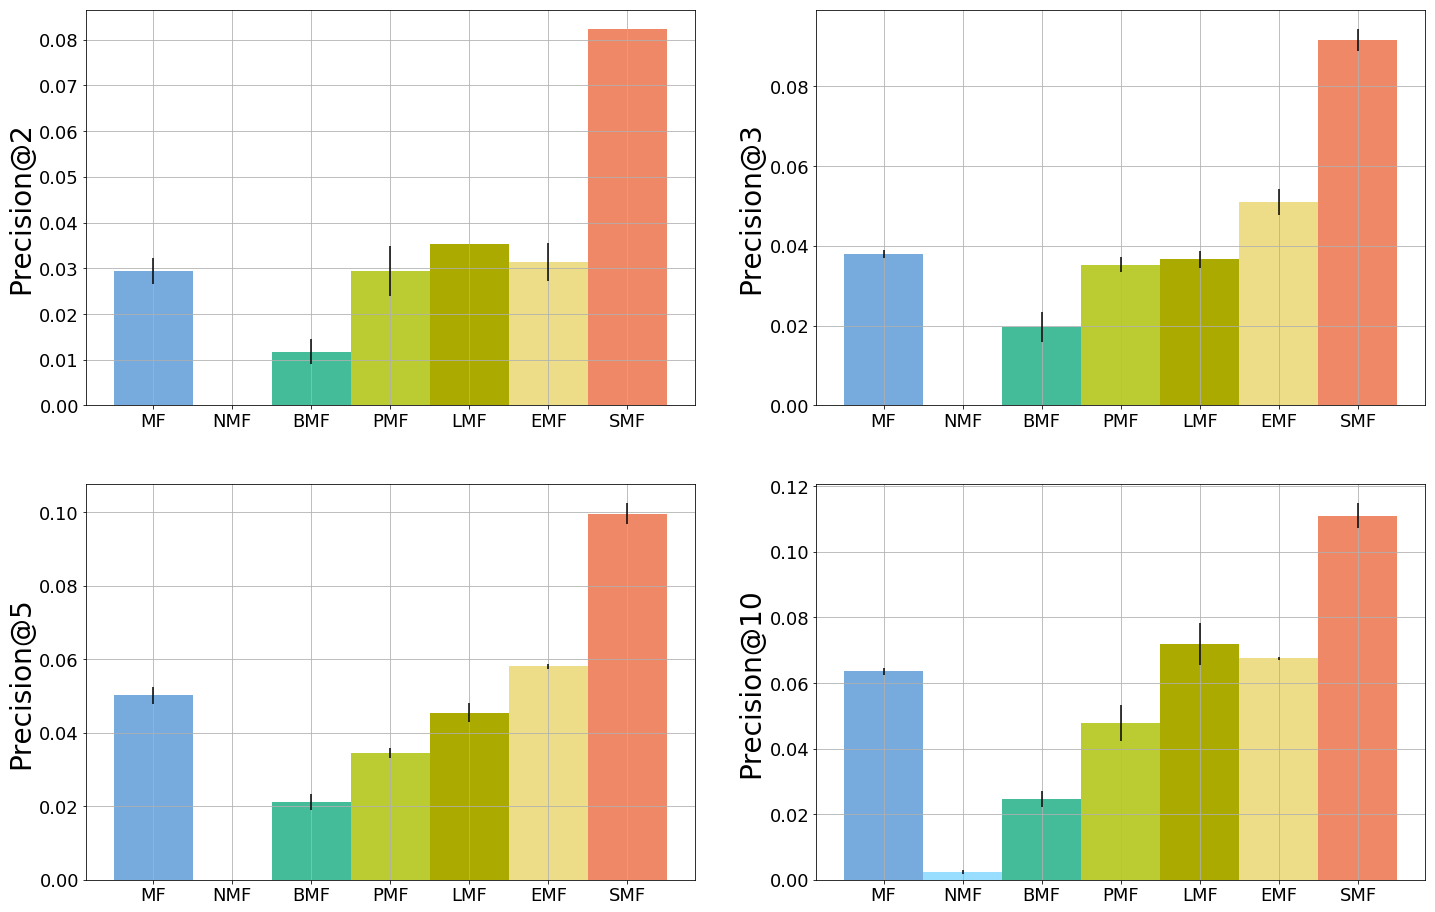

In [10]:
plot_metric('Precision', name2metrics, ns)

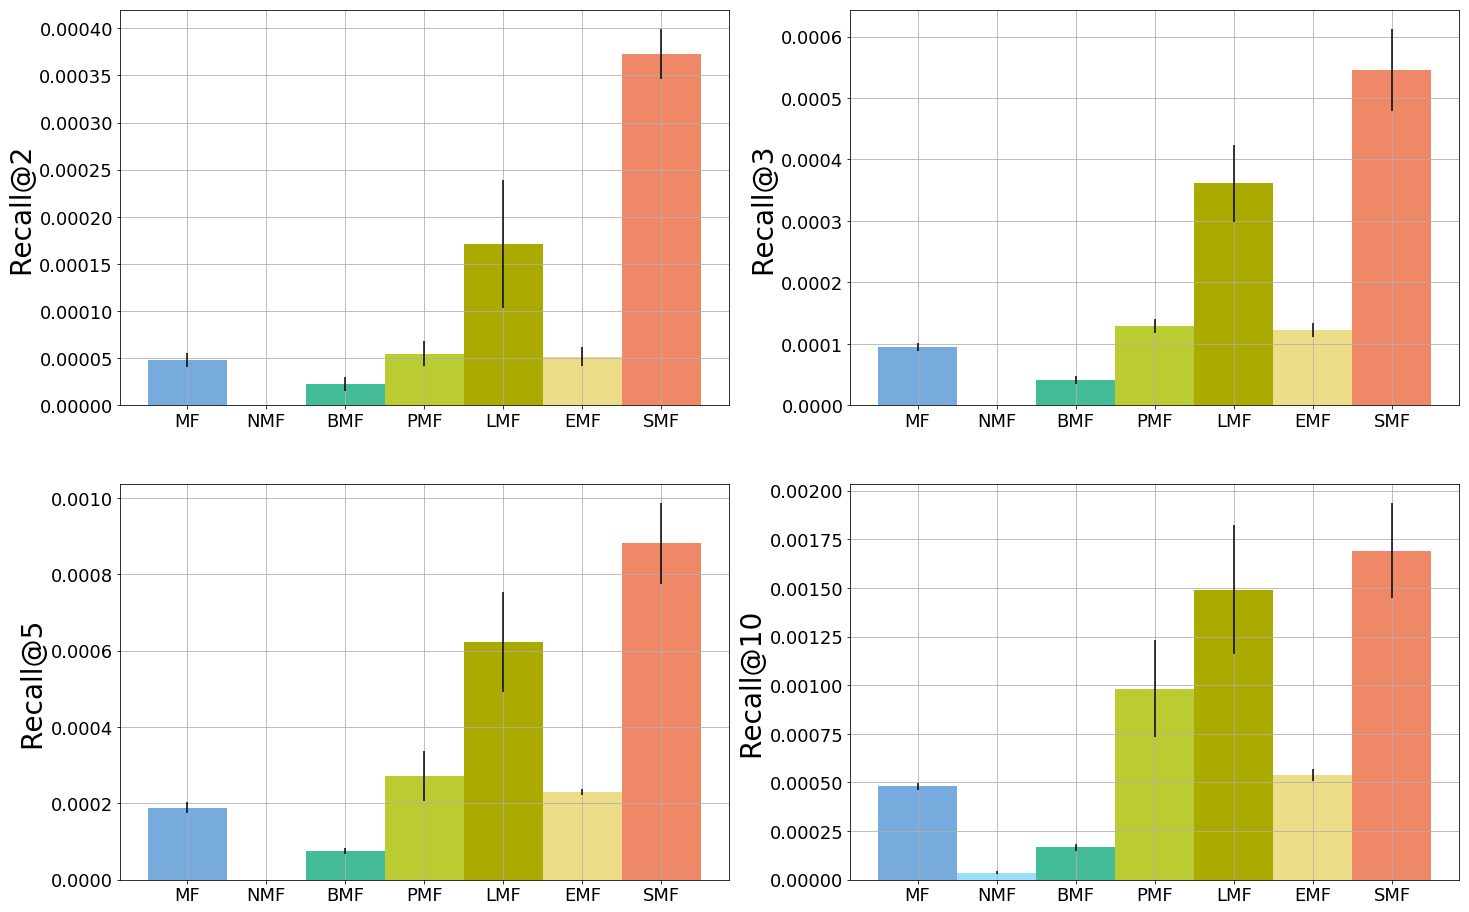

In [11]:
plot_metric('Recall', name2metrics, ns)

## K = 20

In [12]:
name2metrics = name2metrics20
ns = [2,3,5,10]

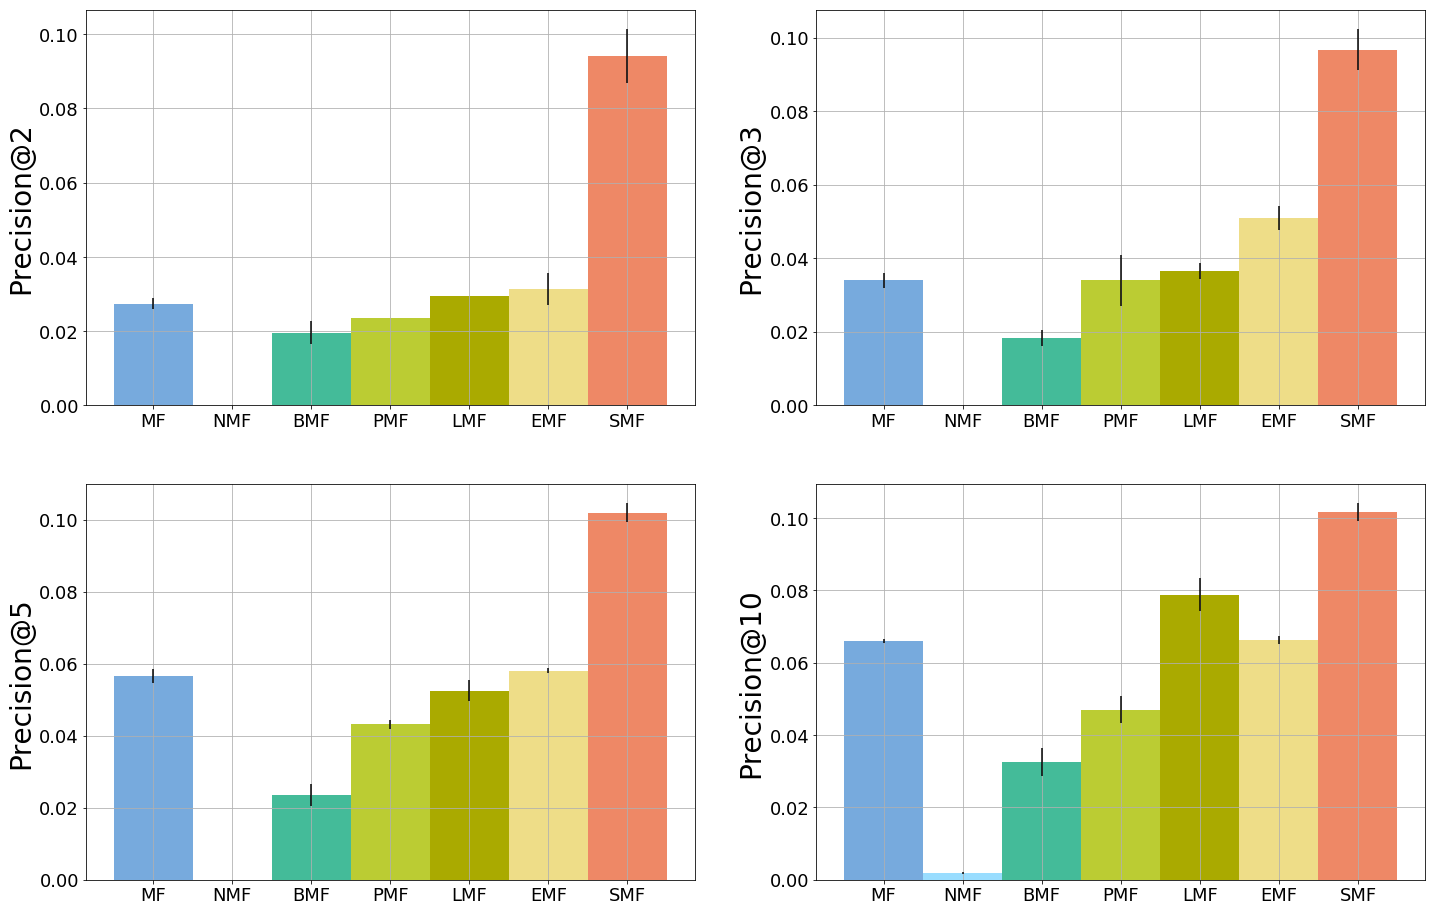

In [13]:
plot_metric('Precision', name2metrics, ns)

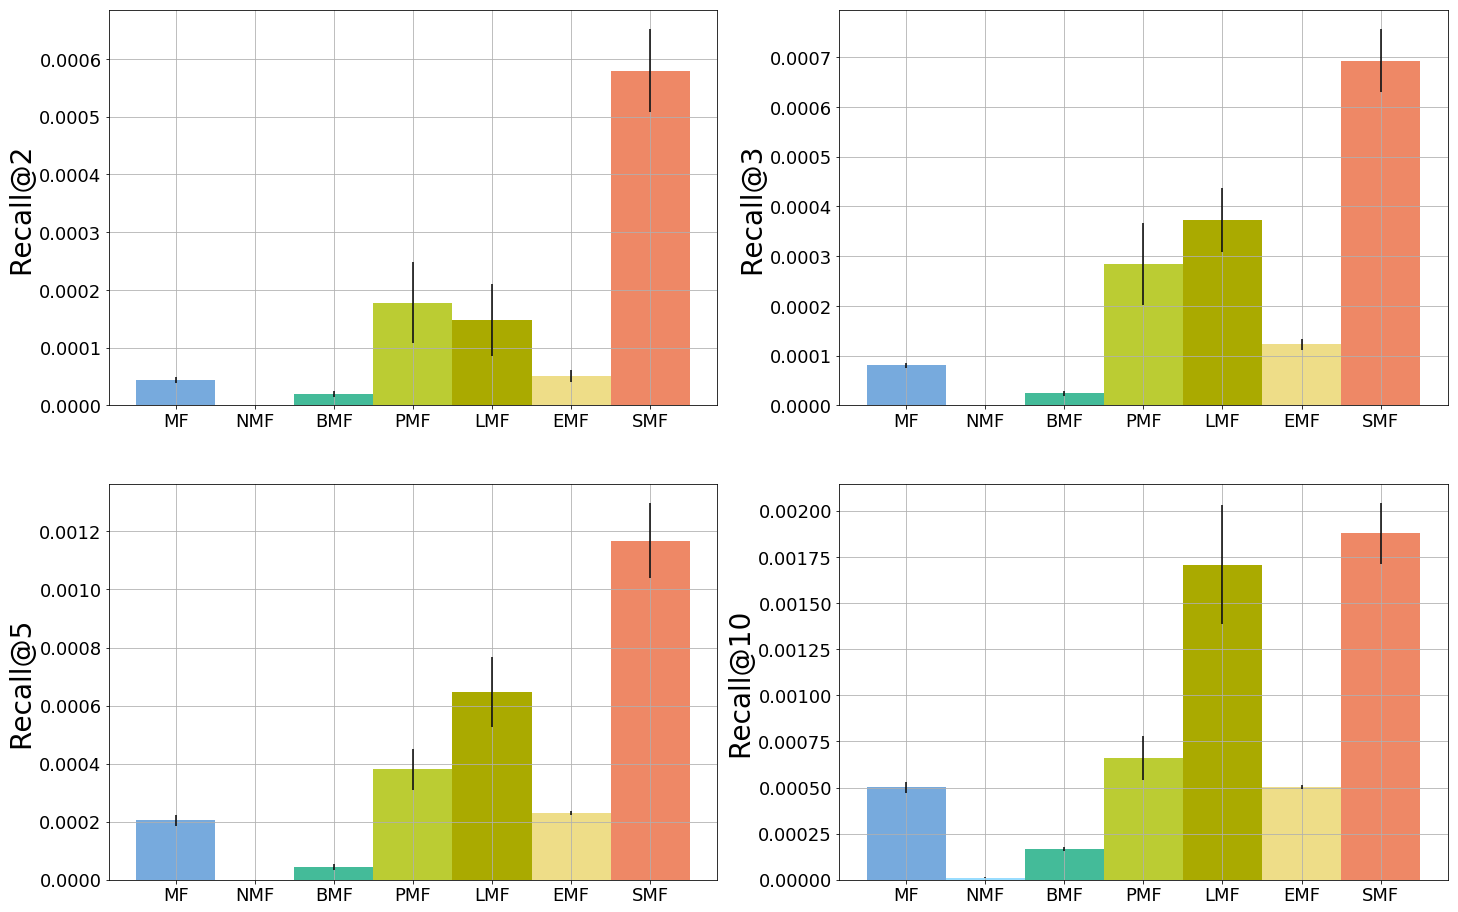

In [14]:
plot_metric('Recall', name2metrics, ns)